## Clustering

In [19]:
import matplotlib.pyplot as plt
from skimage.transform import resize
from os import getcwd, listdir

data_dir = getcwd() + "/data/"
image_paths = [data_dir + filename for filename in listdir(data_dir)]

In [21]:
from skimage.io import imread

images = [imread(path) for path in image_paths]

In [48]:
images[0].shape

(251, 378)

In [49]:
import numpy as np

a = np.array([[[1,1,1],[2,2,2]]])

In [58]:
b = np.array([[1,2,3],
              [4,5,6]])

In [56]:
a.flatten()

array([1, 1, 1, 2, 2, 2])

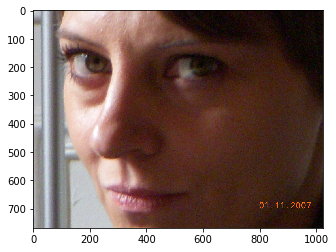

In [52]:
img = images[5]
plt.imshow(img)

In [54]:
img[:,:,1]

(768, 1024)

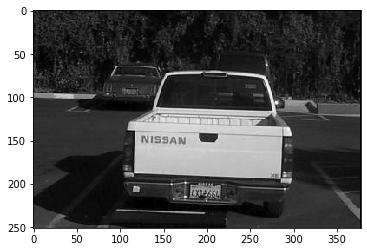

In [64]:
from skimage.color import gray2rgb
colors = gray2rgb(images[0])
plt.imshow(colors)

In [66]:
from skimage.color import gray2rgb

def vectorize(image):
    original_shape = image.shape

    if len(original_shape) == 2:
        image = gray2rgb(image)

    new_image = resize(image, [250,250])
    return new_image.flatten()

In [163]:
from app.image_io import load_images
from app.visual_similarity.cluster_similar import *

path = "data/"
names, images = load_images(path)
vectors = [vectorize(image) for image in images]

In [165]:
threshold = 0.8

not_grouped = set(names)
pairs = []

n = len(vectors)

for i in range(n):
    for j in range(i+1, n):
        if similarity(vectors[i], vectors[j]) >= threshold:
            i_name = names[i]
            j_name = names[j]

            pairs.append((i_name, j_name))

            if i_name in not_grouped:
                not_grouped.remove(i_name)
            if j_name in not_grouped:
                not_grouped.remove(j_name)

In [166]:
groups = group_pairs(pairs)

In [168]:
a = imread("data/Car1.jpg")

In [173]:
type(resize(a, [250,250]))

numpy.ndarray

New stuff

In [4]:
from app.image_io import load_images

In [5]:
names, images = load_images("data/")

In [12]:
import cv2

In [9]:
resized = [resize(image, (300,300)) for image in images]

In [11]:
for i in range(len(resized)):
    print(resized[i].shape)

(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

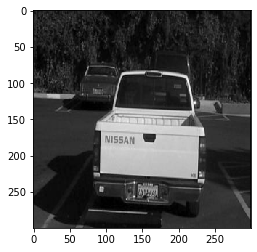

In [18]:
plt.imshow(resized[0])

In [20]:
from app.visual_similarity.cluster_similar import *

In [21]:
for i in range(len(images)):
    for j in range(i+1, len(images)):
        print(similarity(resized[i], resized[j]))

0.6132528976034859
0.7346660566448802
0.7397579956427016
0.7211156717501817
0.6990894698620189
0.5410951198257081
0.6201903267973856
0.5251893681917211
0.6041494553376907
0.7118296296296296
0.7090622512708787
0.7047708351488745
0.6773153812636166
0.6707366158315178
0.6958919535221497
0.750303602033406
0.4957081626724764
0.605930631808279
0.5650215105301379
0.6733780682643428
0.6012867102396514
0.7048601016702978
0.6504627741466957
0.681215003631082
0.6460531880900509
0.655570806100218
0.654920522875817
0.6694749164851126
0.6686601016702978
0.5866906899055919
0.6650374727668845
0.7562963253449528
0.6083420043572985
0.6788476833696443
0.6307658242556282
0.7242585330428468
0.7355174001452434
0.7117434713144517
0.685288249818446
0.7316418881626725
0.6579255047204067
0.6695877124183007
0.6322666957153231
0.6829091067538127
0.7319938126361656
0.7337165141612201
0.6440541757443718
0.7148965867828614
0.7337321132897604
0.7245113870733477
0.7667927814088599
0.6024515177923021
0.6970585911401599

In [22]:
import numpy as np

In [23]:
image1 = resized[0]
image2 = resized[1]

In [26]:
image1.astype('double') - image2.astype('double')

array([[[-223., -223., -223.],
        [-222., -222., -222.],
        [-209., -209., -209.],
        ...,
        [-202., -203., -148.],
        [-231., -221., -158.],
        [-249., -244., -182.]],

       [[-222., -222., -222.],
        [-223., -223., -223.],
        [-214., -214., -214.],
        ...,
        [-140., -182., -139.],
        [-226., -202., -146.],
        [-251., -246., -176.]],

       [[-223., -223., -223.],
        [-227., -227., -227.],
        [-226., -226., -226.],
        ...,
        [-125., -112.,  -93.],
        [-188., -150., -107.],
        [-250., -232., -178.]],

       ...,

       [[ -61.,  -57.,  -42.],
        [ -54.,  -51.,  -37.],
        [ -61.,  -59.,  -48.],
        ...,
        [ -57.,  -63.,  -57.],
        [ -58.,  -62.,  -61.],
        [-102., -102.,  -95.]],

       [[ -60.,  -58.,  -41.],
        [ -52.,  -50.,  -40.],
        [ -65.,  -64.,  -51.],
        ...,
        [ -76.,  -70.,  -69.],
        [ -72.,  -68.,  -63.],
        [-122.,

In [27]:
img1 = image1.astype('double')
img2 = image2.astype('double')

diff = abs(img1 - img2)
diff

array([[[223., 223., 223.],
        [222., 222., 222.],
        [209., 209., 209.],
        ...,
        [202., 203., 148.],
        [231., 221., 158.],
        [249., 244., 182.]],

       [[222., 222., 222.],
        [223., 223., 223.],
        [214., 214., 214.],
        ...,
        [140., 182., 139.],
        [226., 202., 146.],
        [251., 246., 176.]],

       [[223., 223., 223.],
        [227., 227., 227.],
        [226., 226., 226.],
        ...,
        [125., 112.,  93.],
        [188., 150., 107.],
        [250., 232., 178.]],

       ...,

       [[ 61.,  57.,  42.],
        [ 54.,  51.,  37.],
        [ 61.,  59.,  48.],
        ...,
        [ 57.,  63.,  57.],
        [ 58.,  62.,  61.],
        [102., 102.,  95.]],

       [[ 60.,  58.,  41.],
        [ 52.,  50.,  40.],
        [ 65.,  64.,  51.],
        ...,
        [ 76.,  70.,  69.],
        [ 72.,  68.,  63.],
        [122., 116., 112.]],

       [[ 68.,  60.,  52.],
        [ 58.,  54.,  36.],
        [ 65.,  

In [30]:
np.sum(diff / np.iinfo(image1.dtype).max)/image1.size

0.3867471023965141

In [31]:
def compare(u, v):
    """
    Find percent similarity [0,1] between 1D vectors u and v
    """

    ud = u.astype('double')
    vd = v.astype('double')

    datatype_info = np.iinfo(u.dtype)
    max_val = datatype_info.max

    percent_diffs = np.abs(ud - vd) / max_val
    return 1 - np.sum(percent_diffs)/u.size

In [1]:
from app.visual_similarity.cluster_similar import *

res = group_images("data/")

In [2]:
res

['paris_general_000002.jpg',
 'paris_general_000023.jpg',
 'paris_general_000008.jpg',
 ('paris_general_000071.jpg', 'paris_general_000021.jpg'),
 ('20160601_111922.jpg', '20160601_111919.jpg'),
 ('Car1.jpg',
  'paris_general_000003.jpg',
  '20160706_111435.jpg',
  '20160913_140727.jpg',
  '20160706_111437.jpg',
  'Car2.jpg',
  'paris_general_000009.jpg',
  '20160913_140724.jpg'),
 'paris_general_000016.jpg',
 'paris_general_000012.jpg',
 'paris_general_000087.jpg',
 ('20160706_111431.jpg', 'paris_general_000001.jpg')]